In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class ChemSpecies(object):
    
    def __init__(self, name='no name', HeatCapacity=None):
        self.name = name; 
        self.HeatCapacity = HeatCapacity;
    
    def HeatCapacity(self, T):
        """Compute the heat capacity given the temperature T"""
        if self.HeatCapacity is None:
            raise Exception(f'Heat capacity function has not been defined for {self.name}')
        return self.HeatCapacity(T)

    @staticmethod
    def create_predefined_species(name):
        predefined = {}
        if name in predefined:
            return ChemSpecies(name, predefined[name])
        else:
            raise ValueError(f"No predefined species found for {name}")
    
    @staticmethod
    def create_with_coefficients(name, coefficients):
        """Create a ChemSpecies instance with a heat capacity function defined by polynomial coefficients."""
        if len(coefficients) != 7:
            raise ValueError("Coefficients array must contain exactly 7 elements")
        
        def heat_capacity_fn(T):
            A, B, C, D, E, F, G = coefficients
            return A + B*T + C*(T**2) + D*(T**3) + E*(T**4) + F*(T**5) + G*(T**6)

        return ChemSpecies(name, heat_capacity_fn)

In [3]:
data = {
    "Substance name": [
        "Sulfolane", "Cyclohexylbenzene", "Cyclohexane", "Cyclohexene", "O-xylene", 
        "M-xylene", "P-xylene", "2-methyl-butane", "Toluene", "Benzene", 
        "Hydrogen", "Methane", "Diphenyl"
    ],
    "Formula": [
        "C4H8O2S", "C12H16", "C6H12", "C6H10", "C8H10",
        "C8H10", "C8H10", "C5H12", "C7H8", "C6H6",
        "H2", "CH4", "C12H10"
    ],
    "T min (K)": [
        300.75, 281.00, 280.00, 171.41, 248.15,
        248.15, 293.15, 123.15, 180.00, 290.00,
        14.26, 92.00, 343.00
    ],
    "T max (K)": [
        703.58, 670.00, 500.00, 376.55, 605.00,
        605.00, 605.00, 430.00, 560.00, 530.00,
        28.00, 178.00, 740.00
    ],
    "Cp @T min (J/(mol K))": [
        208.16, 257.34, 149.3, 116.39, 173.37,
        168.49, 180.48, 124.46, 135.54, 134.28,
        14.069, 53.37, 271.41
    ],
    "Cp @T max (J/(mol K))": [
        304.89, 263.2, 271, 168.55, 365.22,
        409.81, 411.93, 233.77, 259.84, 229.73,
        29.833, 87.53, 462.63
    ],
    "Cp @298K (J/(mol K))": [
        None, 472.91, 159.76, 148.76, 186.48,
        181.73, 181.23, 164.29, 157.01, 136.14,
        None, None, None
    ],
    "A": [
        155.047419066386, 37.802, -2485.34090909091, 128.808667823696, 639.491328695965,
        1036.21613532885, 1984.64830044333, 134.186874061421, 256.533383144613, 260.09824598,
        22.3998617348384, -121.875499040494, 160.99059826196
    ],
    "B": [
        0.270592004177955, 1.451, 27.5743741087344, -0.0564697829997694, -5.72854585358221,
        -10.3586323553872, -19.2312379702297, -0.384337291133309, -1.6600892236261, 3.68028511351,
        -1.96016623400596, 4.51097027197609, 0.0211480466328259
    ],
    "C": [
        -0.000484625805879089, -0.0032409, -0.107861547459893, -0.00172361568095856, 0.024603030624146,
        0.044053879091671, 0.0744575179839593, 0.00348397758555032, 0.00752110119930185, 1.300606306,
        0.114137711765511, -0.0384807964322499, 0.00143341287100921
    ],
    
    "D": [
        5.72401864448839e-07, 0.0000030515, 0.000186675857843137, 1.26795539283522e-05, -4.3830429914941e-05,
        -7.91365674928892e-05, -1.24564537669766e-04, -9.51550938023042e-06, -1.27972944444442e-05, 2.0314673968,
        -1.2375333597941e-03, 1.09743212214142e-04, -1.96042493713432e-06
    ],

    "E": [
        0, 0, -1.18399064171123e-07, -1.84824692001724e-08, 2.90518815741552e-08,
        5.25485003499814e-08, 7.75751523227289e-08, 1.10333189048332e-08, 8.35574261802994e-09, -1.05406153,
        0, 6.72776835567573e-09, 9.8533555078254e-10
    ]
}
# Creating DataFrame
df = pd.DataFrame(data)

In [4]:

# Create a dictionary to store ChemSpecies instances
chem_species_dict = {}

# Iterate over the DataFrame and create ChemSpecies instances
for index, row in df.iterrows():
    name = row['Substance name']
    coefficients = [row['A'], row['B'], row['C'], row['D'], row['E'], 0, 0]  # Assuming F and G are 0 as they are not provided
    chem_species_dict[name] = ChemSpecies.create_with_coefficients(name, coefficients)

# Now, let's compute the heat capacities at T min and T max for each substance
heat_capacity_results = []

for name, species in chem_species_dict.items():
    T_min = df[df['Substance name'] == name]['T min (K)'].values[0]
    T_max = df[df['Substance name'] == name]['T max (K)'].values[0]
    Cp_min = species.HeatCapacity(T_min)
    Cp_max = species.HeatCapacity(T_max)
    heat_capacity_results.append({
        'Substance': name,
        'Cp @T min': Cp_min,
        'Cp @T max': Cp_max
    })

# Convert the results to a DataFrame for better visualization
heat_capacity_df = pd.DataFrame(heat_capacity_results)

# Display the results
print(heat_capacity_df)

            Substance     Cp @T min     Cp @T max
0           Sulfolane  2.081643e+02  3.048903e+02
1   Cyclohexylbenzene  2.573351e+02  4.729103e+02
2         Cyclohexane  1.493000e+02  2.710000e+02
3         Cyclohexene  1.163893e+02  1.685491e+02
4            O-xylene  1.733714e+02  3.652159e+02
5            M-xylene  1.684877e+02  4.098062e+02
6            P-xylene  1.804846e+02  4.119295e+02
7     2-methyl-butane  1.244592e+02  2.337669e+02
8             Toluene  1.355387e+02  2.598363e+02
9             Benzene -7.405521e+09 -8.286772e+10
10           Hydrogen  1.406900e+01  2.983284e+01
11            Methane  5.337000e+01  8.753000e+01
12           Diphenyl  2.714121e+02  4.626342e+02


In [5]:
# Create a dictionary to store ChemSpecies instances
chem_species_dict = {}

# Iterate over the DataFrame and create ChemSpecies instances
for index, row in df.iterrows():
    name = row['Substance name']
    coefficients = [row['A'], row['B'], row['C'], row['D'], row['E'], 0, 0]  # Assuming F and G are 0 as they are not provided
    chem_species_dict[name] = ChemSpecies.create_with_coefficients(name, coefficients)

# Calculate heat capacities at various temperatures between T min and T max
heat_capacity_results = []

for name, species in chem_species_dict.items():
    T_min = df[df['Substance name'] == name]['T min (K)'].values[0]
    T_max = df[df['Substance name'] == name]['T max (K)'].values[0]
    
    # Ensure at least 25 temperature values are calculated
    num_values = max(25, int((T_max - T_min) / 10))
    temperature_range = np.linspace(T_min, T_max, num_values)

    for T in temperature_range:
        Cp = species.HeatCapacity(T)
        heat_capacity_results.append({
            'Substance': name,
            'Temperature (K)': T,
            'Heat Capacity (J/(mol K))': Cp
        })

# Convert the results to a DataFrame for better visualization
heat_capacity_df = pd.DataFrame(heat_capacity_results)

# Display the results
print(heat_capacity_df)

     Substance  Temperature (K)  Heat Capacity (J/(mol K))
0    Sulfolane       300.750000                 208.164339
1    Sulfolane       311.078974                 209.556701
2    Sulfolane       321.407949                 210.959638
3    Sulfolane       331.736923                 212.376935
4    Sulfolane       342.065897                 213.812376
..         ...              ...                        ...
406   Diphenyl       698.210526                 441.429404
407   Diphenyl       708.657895                 446.647844
408   Diphenyl       719.105263                 451.917519
409   Diphenyl       729.552632                 457.244264
410   Diphenyl       740.000000                 462.634200

[411 rows x 3 columns]


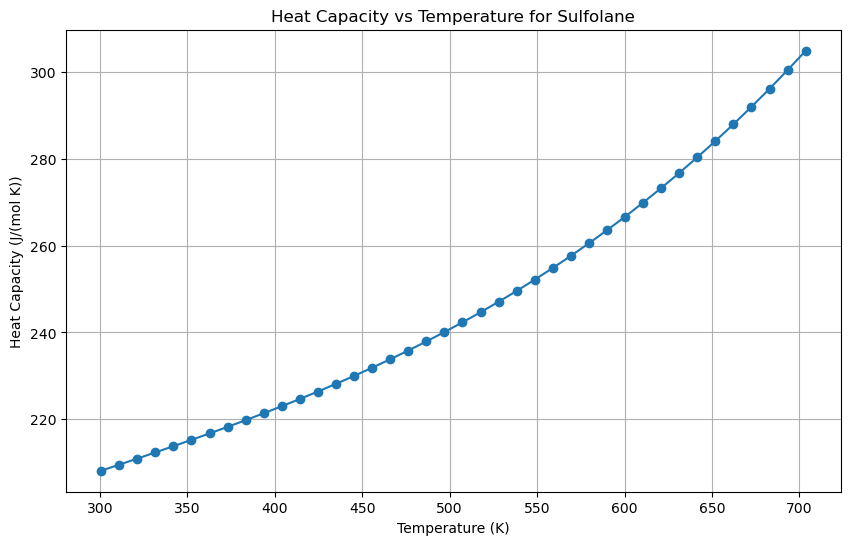

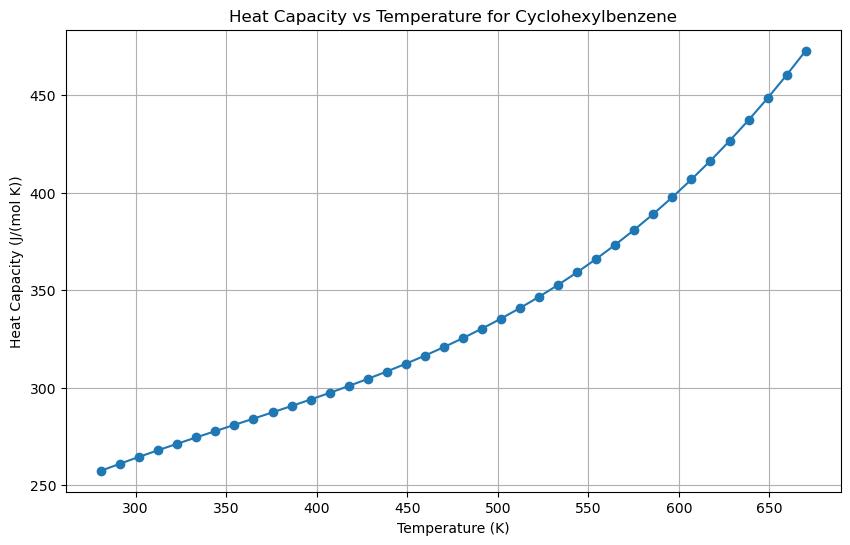

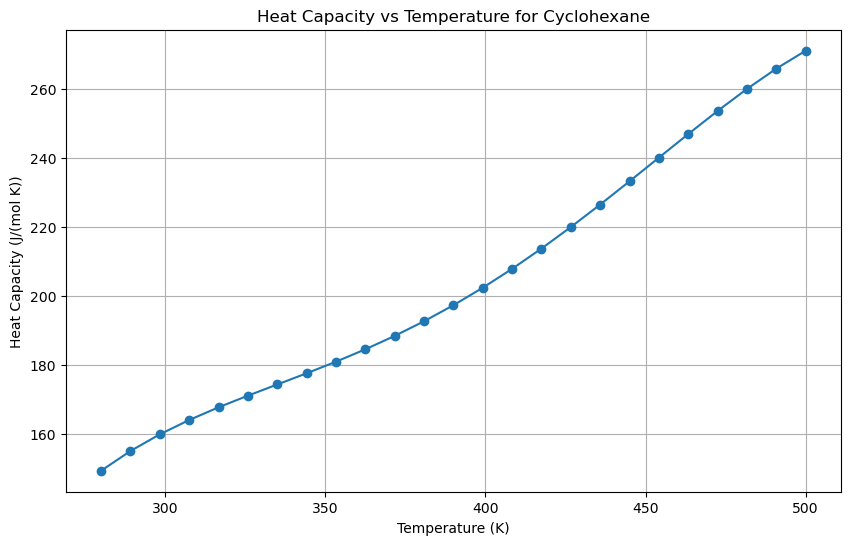

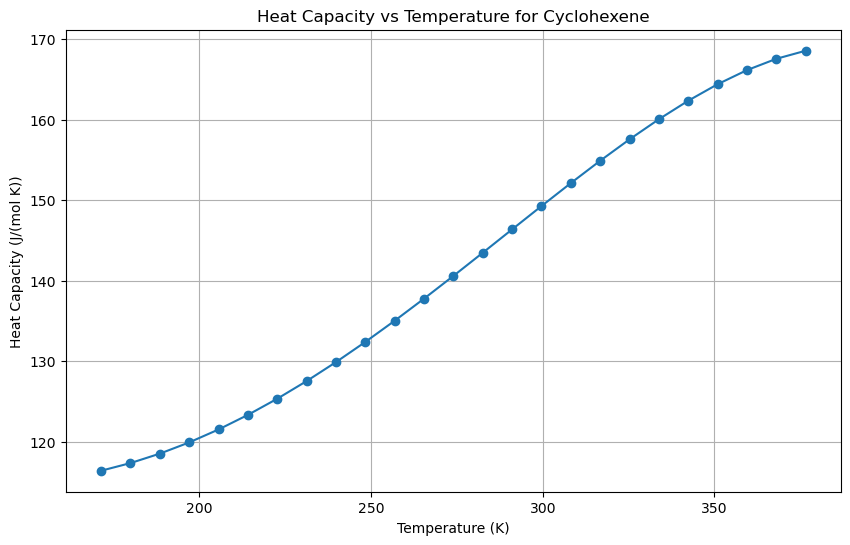

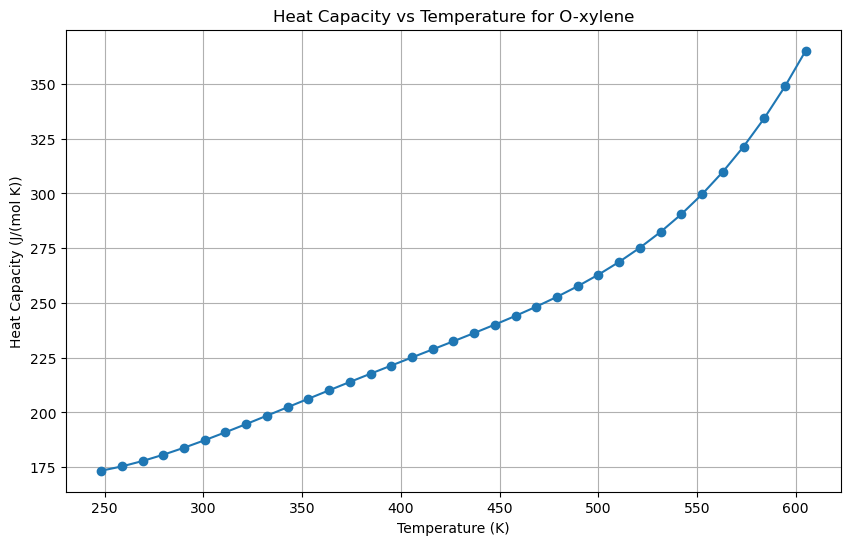

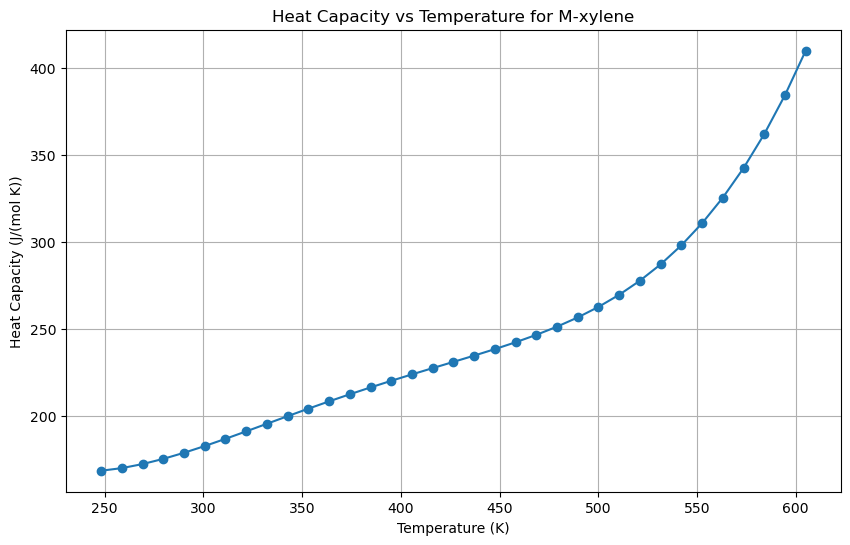

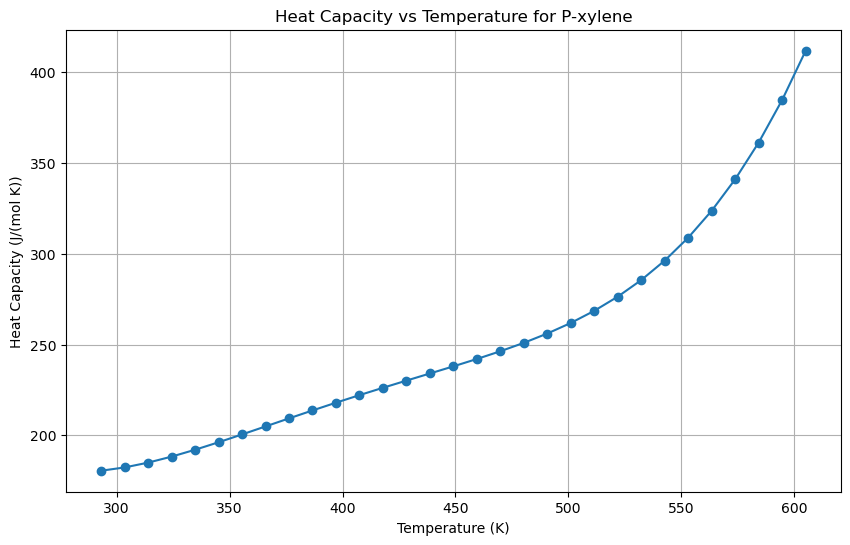

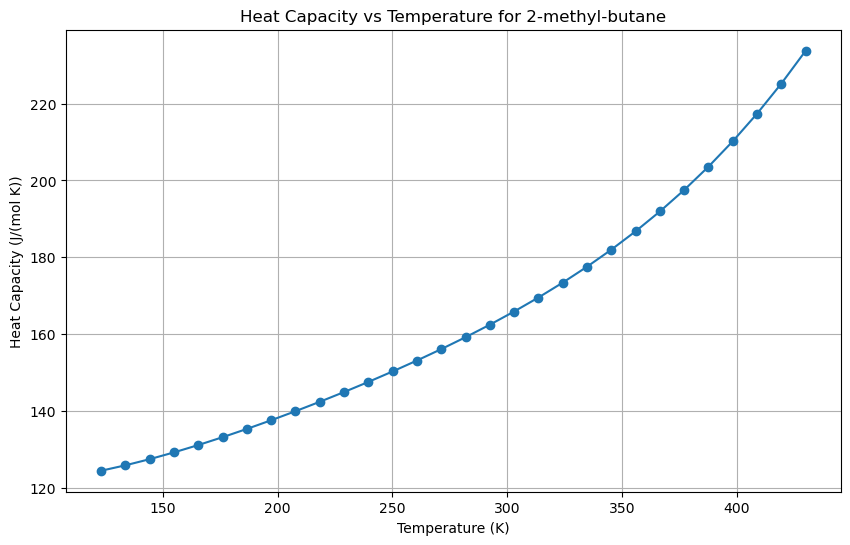

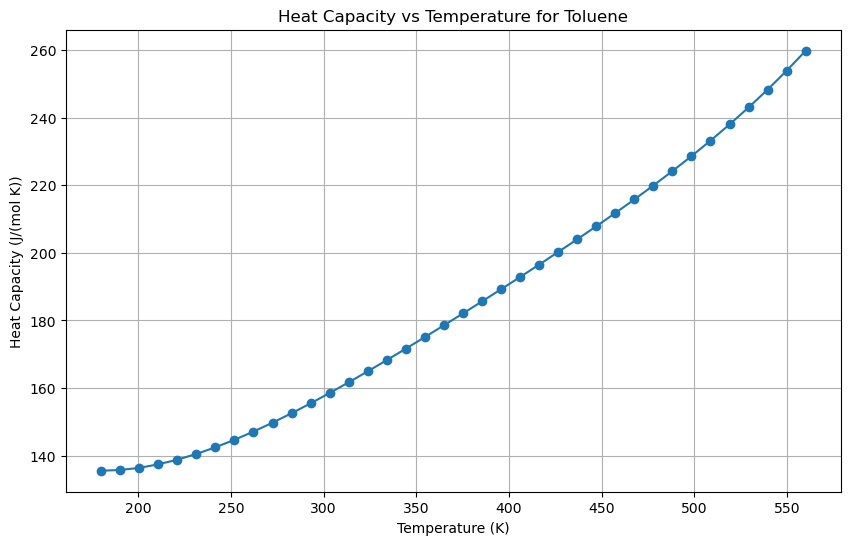

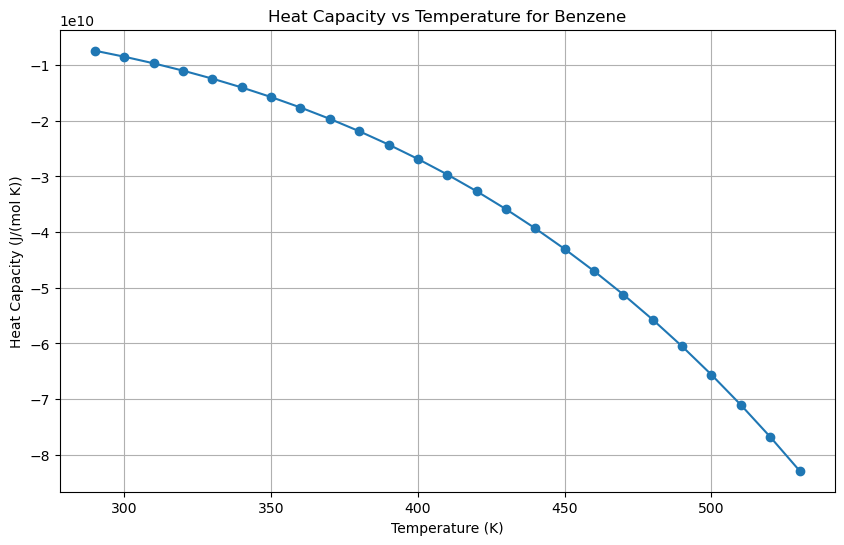

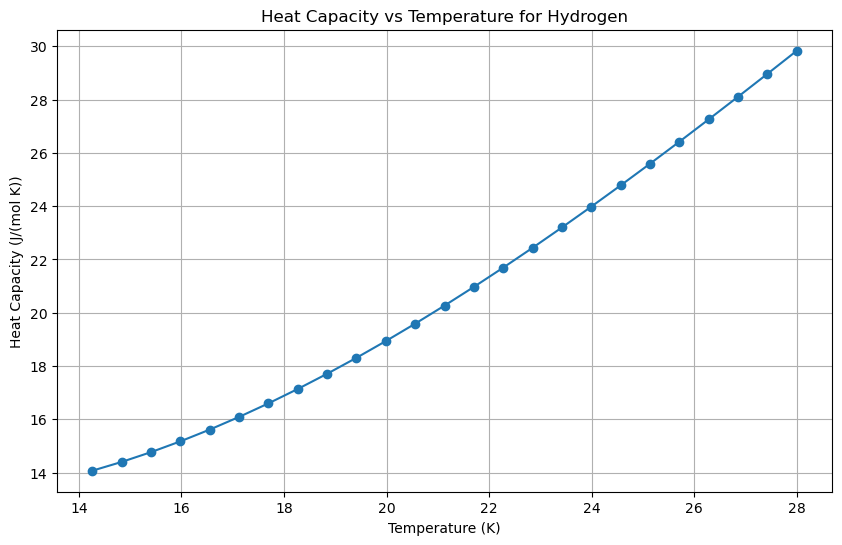

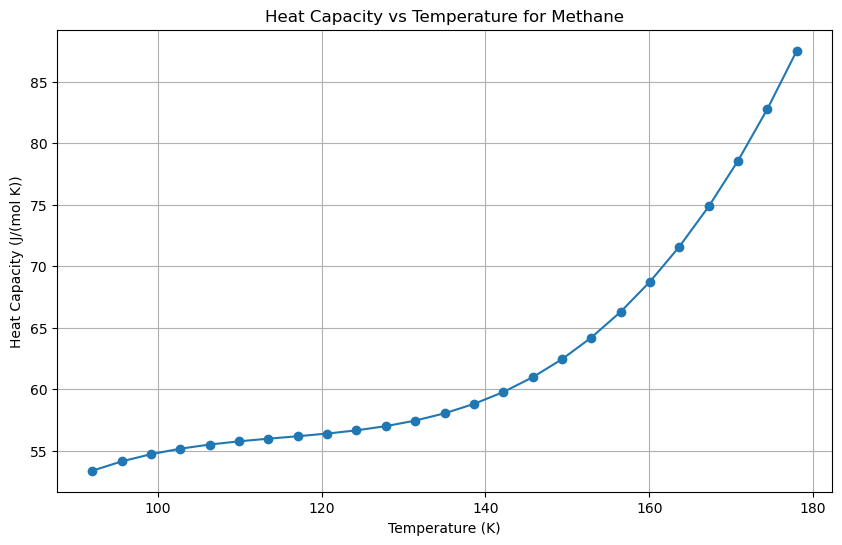

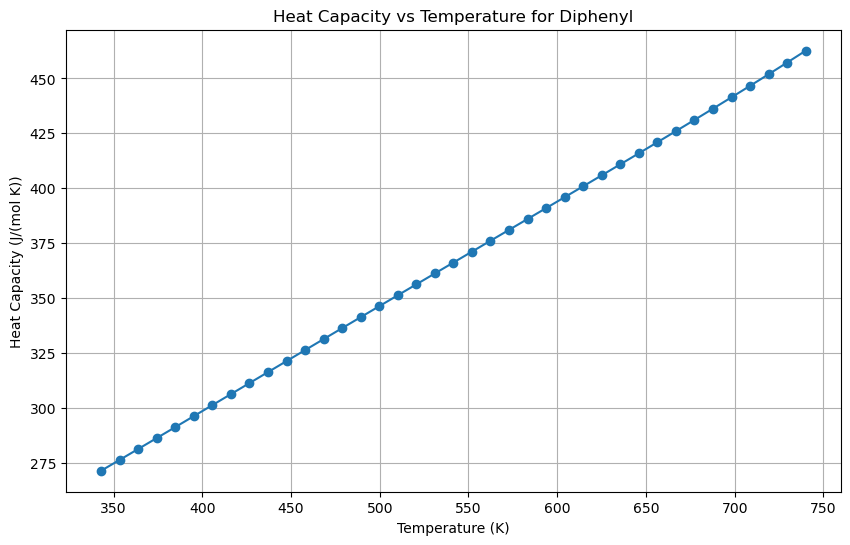

In [6]:
# Plotting the heat capacities for each substance
for name in df['Substance name'].unique():
    # Filter the results for the current substance
    substance_data = heat_capacity_df[heat_capacity_df['Substance'] == name]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(substance_data['Temperature (K)'], substance_data['Heat Capacity (J/(mol K))'], marker='o')
    plt.title(f"Heat Capacity vs Temperature for {name}")
    plt.xlabel("Temperature (K)")
    plt.ylabel("Heat Capacity (J/(mol K))")
    plt.grid(True)
    plt.show()

"Substance name": [
"Benzene", 
"Toluene", 
"O-xylene",
"M-xylene", 
"P-xylene", 
"2-methyl-butane", 
"Hydrogen",
"Methane", 
"Diphenyl",
"Cyclohexene",
"Cyclohexane", 
"Cyclohexylbenzene", 
"Sulfolane"
]

In [19]:
Substance_name = [ "Benzene", "Toluene", "O-xylene", 
                  "M-xylene", "P-xylene", "2-methyl-butane", 
                  "Hydrogen", "Methane", "Diphenyl", 
                  "Cyclohexene", "Cyclohexane", "Cyclohexylbenzene", 
                  "Sulfolane" ]

print(len(Substance_name))

13


In [77]:
# S1

xS1 = [2.93E-01, 5.70E-01, 0.116423589, 
       0.020674931, 8.47E-05, 0.000124683,
       0, 0, 0, 
       0, 0, 0,
       0
      ]

# print(len(xS1))
# print(sum(xS1))


# Temperature 
TS1 = (20 + 20.04785)/2


13
1.000307903


In [123]:
#  S2

# xS2 = [0.980277, 0.019301, 0, 
#        1.07857e-07, 0, 0.000422051,  
#        0, 0, 0, 
#        0, 0, 0,
#        0]

xS2 = [0.980277, 0.019301, 0, 
       0, 0, 0.000422051,  
       0, 0, 0, 
       0, 0, 0,
       0]

# print(len(xS2))
# print(sum(xS2))


# Temperature 
TS2 = (93.7903 + 150)/2 + 273

S2_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS2)
    S2_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS2} [K]': Cp    
    })

df_S2 = pd.DataFrame(S2_heat_capacity)
# print(df_S2)
# df_S2['Cp @ 394.89515 [K]']

# print(xS2)
d = 0
for i in range(13):
    d += df_S2['Cp @ 394.89515 [K]'][i] * xS2[i]
print(d) # (J/(mol K))

222.96223825107379


In [125]:
# S14

# xS14 = [0.661254, 0.0342578, 2.70289e-06, 
#        0.00586583, 6.52755e-08, 2.02299e-09,
#        4.27537e-06, 0.00341175, 0.295204, 
#        0, 0, 0,
#        0]

xS14 = [0.661254, 0.0342578, 2.70289e-06, 
       0.00586583, 0, 0,
       4.27537e-06, 0.00341175, 0.295204, 
       0, 0, 0,
       0]

# print(len(xS14))
# print(sum(xS14))

# Temperature 
TS14 = (2 + 2.060836)/2 + 273

S14_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS14)
    S14_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS14} [K]': Cp    
    })

df_S14 = pd.DataFrame(S14_heat_capacity)
# print(df_S14)
# df_S14['Cp @ 275.030418 [K]']

# print(xS14)

d = 0
for i in range(13):
    d += df_S14['Cp @ 275.030418 [K]'][i] * xS14[i]
print(d) # (J/(mol K))

189.88970082541863


In [127]:
# S15

# xS15 = [0.99429, 0.000520318, 5.17036e-12, 
#        2.37944e-08, 2.07618e-13, 3.07256e-09, 
#         6.49358e-06, 0.00518188, 9.03256e-07,
#        0, 0, 0, 
#        0]

xS15 = [0.99429, 0.000520318, 5.17036e-12, 
       2.37944e-08, 2.07618e-13, 3.07256e-09, 
        6.49358e-06, 0.00518188, 9.03256e-07,
       0, 0, 0, 
       0]

# print(len(xS15))
# print(sum(xS15))

# Temperature 
TS15 = (0.547123 + 150)/2 + 273

S15_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS15)
    S15_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS15} [K]': Cp    
    })

df_S15 = pd.DataFrame(S15_heat_capacity)
# print(df_S15)
# df_S15['Cp @ 348.2735615 [K]']

# print(xS15)

d = 0
for i in range(13):
    d += df_S15['Cp @ 348.2735615 [K]'][i] * xS15[i]
print(d) # (J/(mol K))

214.55582174173728


In [135]:
# S24
xS24 = [0.348263, 0.0100011, 2.54247e-12,
       6.61606e-08, 1.02094e-13, 0.000213025, 
        0.00373855, 0.00220436, 4.44168e-07,
       0.380758, 0.254821, 0,
       0]


# print(len(xS24))
# print(sum(xS24))

# Temperature 
TS24 = (25 + 23.10098)/2 + 273

S24_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS24)
    S24_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS24} [K]': Cp    
    })

df_S24 = pd.DataFrame(S24_heat_capacity)
# print(df_S24)
# df_S24['Cp @ 297.05049 [K]']

# print(xS24)

d = 0
for i in range(13):
    d += df_S24['Cp @ 297.05049 [K]'][i] * xS24[i]
print(d) # (J/(mol K))

-3104586847.461906


In [150]:
# S27
xS27 = [0, 0, 0,
       0, 0, 0,
       0, 0, 0,
       0, 0, 0,        
       1]

# print(len(xS27))
# print(sum(xS27))


# Temperature 
TS27 = (20 + 100)/2 + 273

S27_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS27)
    S27_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS27} [K]': Cp    
    })

df_S27 = pd.DataFrame(S27_heat_capacity)
# print(df_S27)
# df_S27['Cp @ 333.0 [K]']

# print(xS27)

d = 0
for i in range(13):
    d += df_S27['Cp @ 333.0 [K]'][i] * xS27[i]
print(d) # (J/(mol K))


266.7079447025554


In [152]:
# S29
xS29 = [0.000115641, 0.0255768, 6.50211e-12,
       1.69199e-07, 2.61094e-13, 8.05039e-15,
       2.43593e-17, 3.9549e-16, 1.13592e-06,
       0.973655, 0.000651679, 0, 
       0]

# print(len(xS29))
# print(sum(xS29))

# Temperature 
TS29 = (61.79629 + 80)/2 + 273

S29_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS29)
    S29_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS29} [K]': Cp    
    })

df_S29 = pd.DataFrame(S29_heat_capacity)
# print(df_S29)
# df_S29['Cp @ 343.898145 [K]']

# print(xS29)

d = 0
for i in range(13):
    d += df_S29['Cp @ 343.898145 [K]'][i] * xS29[i]
print(d) # (J/(mol K))


-14273979610.834558


In [155]:
# S32
xS32 = [0.999824, 0, 0, 
        0, 0, 1.20684e-07,
        0, 0, 0, 
        0.000131655, 4.43587e-05, 0,
        8.0266e-15
       ]

# print(len(xS32))
# print(sum(xS32))

# Temperature 
TS32 = (78 + 78)/2 + 273

S32_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS32)
    S32_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS32} [K]': Cp    
    })

df_S32 = pd.DataFrame(S32_heat_capacity)
# print(df_S32)
# df_S32['Cp @ 351.0 [K]']

# print(xS32)

d = 0
for i in range(13):
    d += df_S32['Cp @ 351.0 [K]'][i] * xS32[i]
print(d) # (J/(mol K))



-2094555.8950664825


In [157]:
# S33
xS33 = [0.238066, 0, 0, 
        0, 0, 1.35575e-09,
        0, 0, 0, 
        2.90572e-05, 5.43392e-07, 0,
        0.761905
       ]

# print(len(xS33))
# print(sum(xS33))

# Temperature 
TS33 = (33.64892 + 33.73462)/2 + 273


S33_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS33)
    S33_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS33} [K]': Cp    
    })

df_S33 = pd.DataFrame(S33_heat_capacity)
# print(df_S33)
# df_S33['Cp @ 306.69177 [K]']

# print(xS33)

d = 0
for i in range(13):
    d += df_S33['Cp @ 306.69177 [K]'][i] * xS33[i]
print(d) # (J/(mol K))



-269024.33560234704


In [159]:
# S37
xS37 = [0.103577, 0.0264799, 5.55589e-12, 
        1.6095e-07, 2.48766e-13, 3.0841e-08, 
        0, 0, 1.74811e-10, 
        0.869157, 0.000695, 9.12e-05,
        0
       ]

# print(len(xS37))
# print(sum(xS37))

# Temperature 
TS37 = (96.18975279 + 80)/2 + 273

S37_heat_capacity = []

for name, species in chem_species_dict.items():
    Cp = species.HeatCapacity(TS37)
    S37_heat_capacity.append({
        'Substance': name,
        f'Cp @ {TS37} [K]': Cp    
    })

df_S37 = pd.DataFrame(S37_heat_capacity)
# print(df_S37)
# df_S37['Cp @ 361.09487639500003 [K]']

# print(xS37)

d = 0
for i in range(13):
    d += df_S37['Cp @ 361.09487639500003 [K]'][i] * xS37[i]
print(d) # (J/(mol K))

-15492487585.343536
